In [122]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.utils import np_utils
from keras.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import recall_score,precision_score,accuracy_score

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.datasets import make_classification

# Load the MNIST data set

In [123]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

In [124]:
print(X_train[0].shape)

(28, 28)


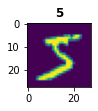

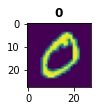

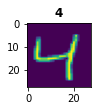

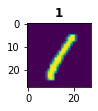

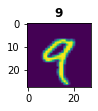

In [125]:
# plotting the first 5 images in the train set of MNIST
for i in range(5):
    plt.subplot(330 + i + 1)
    plt.imshow(X_train[i])
    plt.title(y_train[i],fontweight='bold')
    plt.show()

# Build and train a Keras CNN classifier on the MNIST training set.

In [126]:
#Building input vector
lb=LabelBinarizer()
y_test=lb.fit_transform(y_test)
y_train=lb.fit_transform(y_train)
y_classes=lb.classes_

In [127]:
model=Sequential()

model.add(Conv2D(25,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Flatten())

model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

#model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer=keras.optimizers.Adadelta())
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks=[EarlyStopping(monitor='val_loss',patience=10),
          ModelCheckpoint(filepath='best_model_MNIST.h5',monitor='val_loss',save_best_only=True)]

In [128]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 25)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 16900)             0         
                                                                 
 dense_19 (Dense)            (None, 50)                845050    
                                                                 
 dense_20 (Dense)            (None, 10)                510       
                                                                 
Total params: 845,810
Trainable params: 845,810
Non-trainable params: 0
________________________________________________

In [129]:
history=model.fit(X_train,y_train,batch_size=128,callbacks=callbacks,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 11s 22ms/step - loss: 2.6979 - accuracy: 0.8260 - val_loss: 0.1175 - val_accuracy: 0.9675
Epoch 2/200
469/469 [==============================] - 11s 24ms/step - loss: 0.0849 - accuracy: 0.9760 - val_loss: 0.0826 - val_accuracy: 0.9779
Epoch 3/200
469/469 [==============================] - 11s 24ms/step - loss: 0.0432 - accuracy: 0.9882 - val_loss: 0.0857 - val_accuracy: 0.9792
Epoch 4/200
469/469 [==============================] - 12s 25ms/step - loss: 0.0240 - accuracy: 0.9927 - val_loss: 0.1138 - val_accuracy: 0.9791
Epoch 5/200
469/469 [==============================] - 12s 25ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.1229 - val_accuracy: 0.9764
Epoch 6/200
469/469 [==============================] - 12s 25ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.1288 - val_accuracy: 0.9813
Epoch 7/200
469/469 [==============================] - 12s 26ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.1663 - val_ac

In [130]:
y_pred=model.predict(X_test).round()

313/313 [==============================] - 1s 3ms/step


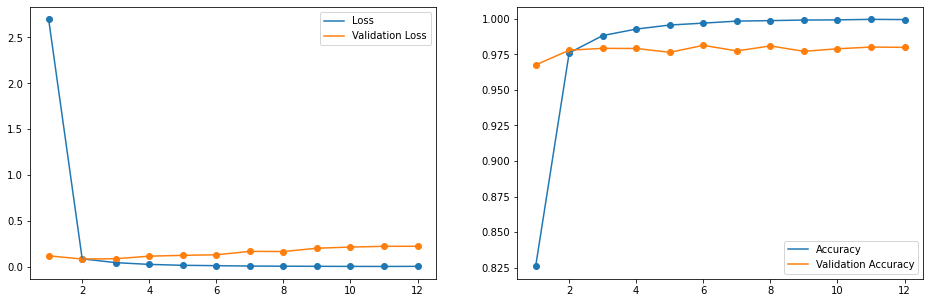

In [131]:
#Plotting losses and accuracy
epochs=len(history.history['loss'])

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))

ax1.plot(np.arange(1,epochs+1),history.history['loss'],label='Loss')
ax1.plot(np.arange(1,epochs+1),history.history['val_loss'],label='Validation Loss')
ax1.scatter(np.arange(1,epochs+1),history.history['loss'])
ax1.scatter(np.arange(1,epochs+1),history.history['val_loss'])

ax2.plot(np.arange(1,epochs+1),history.history['accuracy'],label='Accuracy')
ax2.plot(np.arange(1,epochs+1),history.history['val_accuracy'],label='Validation Accuracy')
ax2.scatter(np.arange(1,epochs+1),history.history['accuracy'])
ax2.scatter(np.arange(1,epochs+1),history.history['val_accuracy'])

ax1.legend()
ax2.legend()
plt.show()

# Report the test accuracy of your model.

In [132]:
#printing Accuracy, REcall, Precision
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100:0.2f}%")
print(f"Precision: {precision_score(y_test,y_pred,average='macro')*100:0.2f}%")
print(f"Recall: {recall_score(y_test,y_pred,average='macro')*100:0.2f}%")

Accuracy: 97.99%
Precision: 97.98%
Recall: 97.98%


In [140]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Loss: ', score[0])
print('Accuracy: ', score[1])

Loss:  0.2219032198190689
Accuracy:  0.9799000024795532


# Display a confusion matrix on the test set classifications.

In [133]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))

In [135]:
matrix

array([[ 969,    1,    1,    1,    1,    1,    1,    0,    4,    1],
       [   0, 1123,    6,    0,    0,    1,    2,    1,    2,    0],
       [   3,    2, 1009,    0,    2,    1,    1,    6,    8,    0],
       [   0,    0,    5,  984,    0,   10,    0,    4,    5,    2],
       [   1,    0,    1,    0,  963,    0,    4,    1,    1,   11],
       [   1,    1,    0,    8,    0,  875,    3,    0,    2,    2],
       [   7,    2,    1,    1,    4,    2,  936,    0,    5,    0],
       [   1,    1,   10,    1,    3,    0,    0, 1000,    6,    6],
       [   2,    0,    2,    2,    3,    1,    2,    3,  957,    2],
       [   1,    1,    1,    6,    4,    3,    0,    7,    3,  983]])

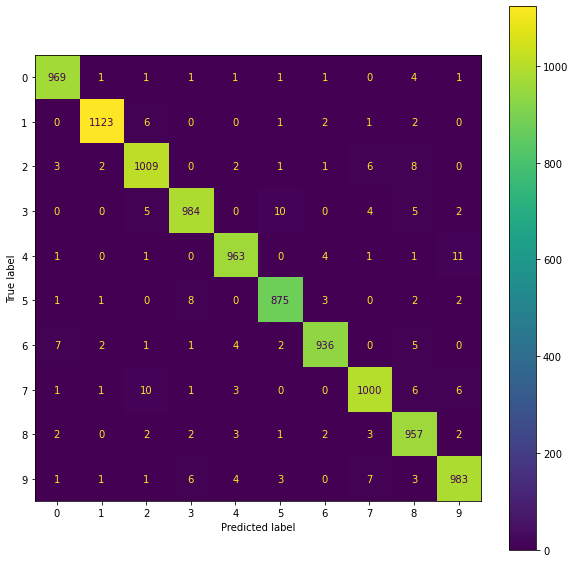

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax=plt.subplots(figsize=(10,10))
fig=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=y_classes)
fig.plot(ax=ax)
plt.show()

# Summarize your results.

Upon the analysis of the results, I have observed the below thing in the model:

    1. Accuracy: 97.99% - This shows that the model is the best fit. As per studies, any model which has over 50% accuracy is a good model.
    
    2. Precision: 97.98% - The higher the precision, the better the model. As we have 97.98%, we can say that our model is a goodfit.
    
    3. Recall: 97.98% - Recall should be high as possible. As we have 97.98%, we can say that our model is a goodfit.